# Importando bibliotecas e lendo arquivos

In [1]:
import pandas as pd
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import norm

In [63]:
tabela = pd.read_csv('campeonato-brasileiro-full.csv')
cheio = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv')

In [3]:
# Limpanda o dataframe
del tabela['formacao_mandante']
del tabela['formacao_visitante']
del tabela['tecnico_mandante']
del tabela['tecnico_visitante']
del tabela['arena']
del tabela['hora']

In [4]:
tabela

,ID,rodata,data,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,Guarani,Vasco,Guarani,4,2,SP,RJ
1,2,1,29/3/2003,Athletico-PR,Gremio,Athletico-PR,2,0,PR,RS
2,3,1,30/3/2003,Flamengo,Coritiba,-,1,1,RJ,PR
3,4,1,30/3/2003,Goias,Paysandu,-,2,2,GO,PA
4,5,1,30/3/2003,Internacional,Ponte Preta,-,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,13/11/2022,Cuiaba,Coritiba,Cuiaba,2,1,MT,PR
8021,8022,38,13/11/2022,Bragantino,Fluminense,Fluminense,0,1,SP,RJ
8022,8023,38,13/11/2022,Corinthians,Atletico-MG,Atletico-MG,0,1,SP,MG
8023,8024,38,13/11/2022,Internacional,Palmeiras,Internacional,3,0,RS,SP


# Distribuição geométrica:
---
## Número de jogos até a primeira vitória

In [5]:
# Função que calcula, em média, quantos jogos são necessários até a primeira vitória
def previsao(x):
    distribuicao = geom(x)
    media = distribuicao.mean()
    return round(media, 0)

In [6]:
equipes = ['Corinthians', 'Palmeiras', 'Santos', 'Gremio', 'Cruzeiro',
          'Flamengo', 'Vasco', 'Cuiaba', 'Atletico-MG', 'Botafogo-RJ',
          'Athletico-PR', 'Bahia', 'Sao Paulo', 'Fluminense', 'America-MG',
          'Bragantino', 'Coritiba', 'Goias', 'Fortaleza', 'Internacional']

In [7]:
# Criando dicionário com as probabilidades de vitórias como mandante
casa = {}
    
for time in equipes:
    jogos_mandante = tabela[tabela['mandante'] == time]
    vitorias_mandante = len(jogos_mandante[jogos_mandante['vencedor'] == time])
    casa[time] = round(vitorias_mandante / len(jogos_mandante), 3)

esp_casa = {}

for time, valor in casa.items():
    esp_casa[time] = previsao(valor)

lista = []

for time, valor in casa.items():
    lista.append(valor)
casa

{'Corinthians': 0.553,
 'Palmeiras': 0.569,
 'Santos': 0.574,
 'Gremio': 0.583,
 'Cruzeiro': 0.553,
 'Flamengo': 0.55,
 'Vasco': 0.441,
 'Cuiaba': 0.342,
 'Atletico-MG': 0.558,
 'Botafogo-RJ': 0.458,
 'Athletico-PR': 0.569,
 'Bahia': 0.412,
 'Sao Paulo': 0.567,
 'Fluminense': 0.492,
 'America-MG': 0.421,
 'Bragantino': 0.439,
 'Coritiba': 0.493,
 'Goias': 0.489,
 'Fortaleza': 0.46,
 'Internacional': 0.593}

In [8]:
# Criando dicionário com as probabilidades de vitórias como visitante
fora = {}
    
for time in equipes:
    jogos_visitante = tabela[tabela['visitante'] == time]
    vitorias_visitante = len(jogos_visitante[jogos_visitante['vencedor'] == time])
    fora[time] = round(vitorias_visitante / len(jogos_visitante), 3)

esp_fora = {}

for time, valor in fora.items():
    esp_fora[time] = previsao(valor)
    
fora

lista_2 = []

for time, valor in fora.items():
    lista_2.append(valor)
    
fora

{'Corinthians': 0.294,
 'Palmeiras': 0.319,
 'Santos': 0.269,
 'Gremio': 0.26,
 'Cruzeiro': 0.327,
 'Flamengo': 0.309,
 'Vasco': 0.224,
 'Cuiaba': 0.184,
 'Atletico-MG': 0.273,
 'Botafogo-RJ': 0.238,
 'Athletico-PR': 0.226,
 'Bahia': 0.18,
 'Sao Paulo': 0.333,
 'Fluminense': 0.292,
 'America-MG': 0.137,
 'Bragantino': 0.228,
 'Coritiba': 0.163,
 'Goias': 0.236,
 'Fortaleza': 0.209,
 'Internacional': 0.28}

In [9]:
# Criando dicionário com as probabilidades de vitórias de todos os times
todos = {}

for time in equipes:
    jogo_mandante = tabela[tabela['mandante'] == time]
    jogo_visitante = tabela[tabela['visitante'] == time]
    vitoria = tabela[tabela['vencedor'] == time]
    todos[time] = round(len(vitoria) / (len(jogo_mandante) + len(jogo_visitante)), 3)
    
esp = {}

for time, valor in todos.items():
    esp[time] = previsao(valor)

In [10]:
# Dados dos jogos em casa e fora
jogos_casa = lista
jogos_fora = lista_2

# Aplicação do teste t de Student
statistic, p_value = ttest_ind(jogos_casa, jogos_fora, equal_var=True)

# Interpretação do resultado
if p_value < 0.05:
    print("Há diferenças significativas entre as médias.")
else:
    print("Não há evidências suficientes para afirmar diferenças significativas.")

Há diferenças significativas entre as médias.


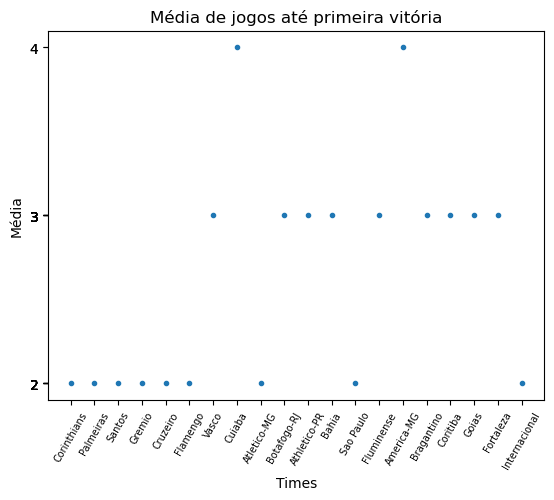

In [11]:
# Gráfico

x = list(esp.keys())
y = list(esp.values())

plt.scatter(x, y, marker='.') 

plt.xlabel('Times') 
plt.ylabel('Média')

plt.title('Média de jogos até primeira vitória')

plt.xticks(rotation=60, fontsize=7)
plt.yticks(y)

plt.savefig('Distribuição geométrica.png', dpi=300)

plt.show()

# Intervalo de confiança:
---
## Média de gols por jogo

In [87]:
bra = cheio[cheio['partida_id'] >= 7646]
bra = bra[bra['clube'] == 'Fluminense']
bra.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
15290,7646,1,Fluminense,26,6,66%,545,88%,14,1,0,0,8
15317,7659,2,Fluminense,12,3,62%,525,86%,14,1,0,0,5
15338,7679,3,Fluminense,12,2,58%,503,85%,15,5,0,4,5
15363,7673,4,Fluminense,7,4,45%,386,81%,16,2,1,2,1
15375,7689,5,Fluminense,8,2,52%,403,83%,13,2,0,0,3


In [102]:
posse = bra['posse_de_bola'].tolist()
posse = [float(valor.strip('%')) for valor in posse]
posse

[66.0,
 62.0,
 58.0,
 45.0,
 52.0,
 64.0,
 36.0,
 63.0,
 52.0,
 43.0,
 47.0,
 79.0,
 49.0,
 80.0,
 58.0,
 60.0,
 64.0,
 74.0,
 61.0,
 68.0,
 65.0,
 68.0,
 64.0,
 61.0,
 74.0,
 67.0,
 51.0,
 62.0,
 71.0,
 60.0,
 63.0,
 58.0,
 65.0,
 53.0,
 71.0,
 66.0,
 77.0,
 59.0]

In [110]:
media = np.mean(posse)

dp = np.std(posse)
print(media, dp)

61.473684210526315 9.770354844887358


In [ ]:
from scipy.stats import shapiro
import numpy as np

# Gere alguns dados fictícios para o exemplo
dados_posse_bola = np.random.normal(media, dp, 1000000000)  # Distribuição normal com média 0 e desvio padrão 1

# Realize o teste de Shapiro-Wilk
stat, p_valor = shapiro(posse)

# Imprima os resultados
print(f'Estatística de teste: {stat}')
print(f'Valor p: {p_valor}')

# Verifique se rejeitamos a hipótese nula
alfa = 0.05
if p_valor > alfa:
    print('Não podemos rejeitar a hipótese nula (dados seguem uma distribuição normal)')
else:
    print('Rejeitamos a hipótese nula (dados não seguem uma distribuição normal)')